# Homework 2: Stochastic Gradient Descent

```{warning}
The submission of the homeworks has **NO** deadline. You can submit them whenever you want, on Virtuale. You are only required to upload it on Virtuale **BEFORE** your exam session, since the Homeworks will be a central part of the oral exam. 

You are asked to submit the homework as one of the two, following modalities:
* A PDF (or Word) document, containing screenshoots of code snippets, screeshots of the results generated by your code, and a brief comment on the obtained results.
* A Python Notebook (i.e. a `.ipynb` file), with cells containing the code required to solve the indicated exercises, alternated with a brief comment on the obtained results in the form of a markdown cell. We remark that the code **SHOULD NOT** be runned during the exam, but the student is asked to enter the exam with all the programs **already executed**, with the results clearly visible on the screen.

Joining the oral exam with a non-executed code OR without a PDF file with the obtained results visible on that, will cause the student to be rejected.
```


## Exercise 1: SGD vs GD on a Simple 1D Regression Problem

Consider the synthetic dataset

$$
x^{(i)} = \frac{i}{N},\qquad
y^{(i)} = 2x^{(i)} + 1 + \varepsilon^{(i)}, \qquad \varepsilon^{(i)}\sim\mathcal N(0,0.01),
$$

with $N = 200$.
We model the data with a linear function:

$$
f_\Theta(x) = \Theta_0 + \Theta_1 x = \Theta^T \tilde{x},
$$

if we define $\tilde{x} = [1, x]$ as we did during the lab session.


1. Implement the MSE loss:
   
   $$
   \mathcal L(\Theta)=\frac{1}{N}\sum_{i=1}^N (f_\Theta(x^{(i)}) - y^{(i)})^2.
   $$


In [3]:
import numpy as np
import matplotlib.pyplot as plt

N = 200
X = np.linspace(0, 1, N)
Y = 2 * X + np.random.normal(0, 0.1, size=N)

def f(theta, X):
    return theta[0] + theta[1] * X

def l(theta, X, Y):
    r = f(theta, X) - Y
    return np.mean(r**2)

def grad_l(theta, X, Y):
    r = f(theta, X) - Y
    g0 = 2 * np.mean(r)
    g1 = 2 * np.mean(r * X)
    return np.array([g0, g1])



2. Implement **full GD** and **SGD** (mini-batch) using batch sizes:
   - $N_{\text{batch}} = 1$,
   - $N_{\text{batch}} = 10$,
   - $N_{\text{batch}} = 50$,
   - $N_{\text{batch}} = N$ (this recovers GD).


In [15]:
def GD(l, grad_l, X, Y, theta_0, eta, maxit):
    theta_vals = [theta_0]
    for k in range(maxit):
        theta = theta_0 - eta * grad_l(theta_0, X, Y)
        theta_0 = theta
        theta_vals.append(theta)
    return theta_0, np.array(theta_vals)


def SGD(l, grad_l, X, Y, Theta0, lr=1e-2, batch_size=32, epochs=10):
    
    Theta = Theta0.copy()

    Theta_hist = [Theta0].copy()
    loss_hist = [l(Theta, X, Y)]

    for epoch in range(epochs):
        shuffle_idx = np.arange(len(X))
        np.random.shuffle(shuffle_idx)

        Xs = X[shuffle_idx]
        Ys = Y[shuffle_idx]

        n_batches = len(Xs) // batch_size
        for batch in range(n_batches):

            Xb = Xs[batch * batch_size : (batch+1) * batch_size]
            Yb = Ys[batch * batch_size : (batch+1) * batch_size]

            g = grad_l(Theta, Xb, Yb)
            Theta = Theta - lr * g

            Theta_hist.append(Theta.copy())

        loss_hist.append(l(Theta, X, Y))
    return Theta, np.array(Theta_hist), np.array(loss_hist)



3. Plot for each method:
   - the loss curve (loss vs epoch),
   - the trajectory of parameters $(\Theta_0,\Theta_1)$ in the 2D parameter space. This is similar to what you did in the previous homework: simply plot the value of $\Theta_0^{(k)}$ and $\Theta_1^{(k)}$ for all the $k$s in a 2-dimensional plot.


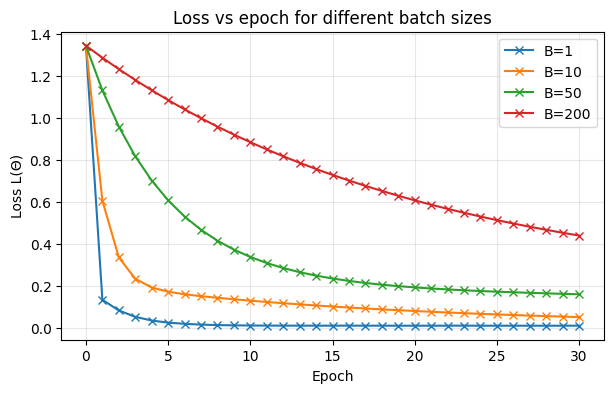

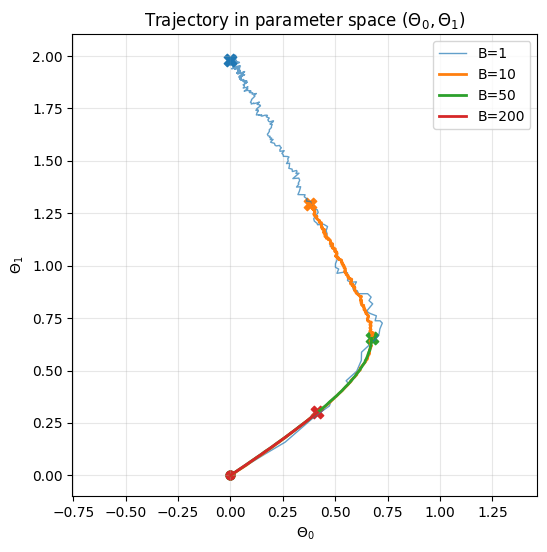

In [ ]:
theta0 = np.array([0.0, 0.0])
epochs = 30
lr = 1e-2
batch_sizes = [1, 10, 50, 200]

results = {}

for B in batch_sizes:
    Theta_final, Theta_hist, loss_hist = SGD(l, grad_l, X, Y, theta0, lr=lr, batch_size=B, epochs=epochs)
    results[B] = {"Theta_hist": Theta_hist, "loss_hist": loss_hist, "Theta_final": Theta_final}


plt.figure(figsize=(7,4))
for B in batch_sizes:
    plt.plot(results[B]["loss_hist"], marker="x", label=f"B={B}")
#plt.yscale("log")
plt.xlabel("Epoch")
plt.ylabel("Loss L(Θ)")
plt.grid(alpha=0.3)
plt.title("Loss vs epoch for different batch sizes")
plt.legend()
plt.show()

plt.figure(figsize=(6,6))

for B in batch_sizes:
    th = results[B]["Theta_hist"]

    #  most noisy traj
    if B == 1:
        th_plot = th[::10]   # keep every 10th point
        lw = 1.0
        alpha = 0.7
    else:
        th_plot = th
        lw = 2.0
        alpha = 1.0

    plt.plot(
        th_plot[:,0],
        th_plot[:,1],
        linewidth=lw,
        alpha=alpha,
        label=f"B={B}"
    )

    # Start o
    plt.scatter(
        th_plot[0,0],
        th_plot[0,1],
        s=40,
        marker="o",
        color=plt.gca().lines[-1].get_color()
    )

    # End x
    plt.scatter(
        th_plot[-1,0],
        th_plot[-1,1],
        s=80,
        marker="X",
        color=plt.gca().lines[-1].get_color()
    )

plt.xlabel(r"$\Theta_0$")
plt.ylabel(r"$\Theta_1$")
plt.title(r"Trajectory in parameter space $(\Theta_0,\Theta_1)$")
plt.grid(alpha=0.3)
plt.legend()
plt.axis("equal") 
plt.show()




4. Discuss:
   - Why GD is smooth but slow for large $N$,
   - Why SGD is noisy but progresses faster,
   - How batch size affects the noise level and convergence stability.